In [8]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [9]:
v = 99  # STS(v) v = 1 or 3 (mod 6)
num_tri = round( v * (v-1) / 6 )     # |B|
max_times = round( (v - 1) / 2 )
times = np.zeros(v, dtype=int)
B = []

In [10]:
def get_living_pairs(i, B=B, v=v):
    candidates = np.ones(v, dtype=int)
    for triple in B:
        if i in triple:
            candidates[triple[0]] = 0
            candidates[triple[1]] = 0
            candidates[triple[2]] = 0
        else:
            pass

    return candidates.nonzero()[0]

In [11]:
size_steps = [0]
while len(B) < num_tri:
    living_points = times < max_times
    i = np.random.choice(np.nonzero(living_points)[0])
    living_pairs = get_living_pairs(i, B, v)
    new_pairs = np.random.choice(living_pairs,size=2,replace=False)

    for triple in B:
        if new_pairs[0] in triple and new_pairs[1] in triple:
            B.remove(triple)
            for j in triple:
                times[j] -= 1

    new_triple = [i,new_pairs[0],new_pairs[1]]
    B.append(new_triple)
    for j in new_triple:
        times[j] += 1

    size_steps.append(len(B))

In [12]:
B

[[8, 96, 84],
 [8, 35, 4],
 [49, 14, 84],
 [86, 62, 39],
 [46, 33, 93],
 [22, 17, 15],
 [81, 27, 43],
 [41, 9, 47],
 [97, 61, 77],
 [73, 11, 89],
 [51, 17, 23],
 [22, 79, 73],
 [8, 15, 40],
 [16, 24, 25],
 [19, 51, 55],
 [6, 68, 51],
 [25, 57, 92],
 [30, 17, 95],
 [66, 24, 30],
 [55, 83, 17],
 [53, 20, 4],
 [97, 19, 29],
 [56, 4, 92],
 [24, 91, 26],
 [55, 25, 4],
 [14, 19, 98],
 [70, 92, 97],
 [4, 68, 11],
 [30, 43, 0],
 [73, 26, 15],
 [28, 36, 72],
 [69, 93, 62],
 [1, 30, 86],
 [6, 46, 98],
 [8, 27, 0],
 [97, 68, 22],
 [93, 88, 30],
 [23, 55, 89],
 [84, 16, 27],
 [75, 16, 21],
 [59, 44, 24],
 [31, 30, 91],
 [41, 30, 80],
 [59, 4, 2],
 [7, 98, 56],
 [1, 92, 2],
 [79, 14, 18],
 [10, 14, 55],
 [92, 69, 30],
 [58, 30, 71],
 [36, 78, 92],
 [25, 13, 77],
 [75, 33, 43],
 [51, 0, 54],
 [17, 89, 36],
 [59, 39, 32],
 [16, 0, 4],
 [0, 28, 26],
 [90, 15, 34],
 [80, 59, 34],
 [21, 27, 54],
 [64, 8, 43],
 [15, 4, 6],
 [84, 47, 51],
 [87, 94, 91],
 [67, 95, 84],
 [77, 30, 56],
 [98, 9, 32],
 [27, 55

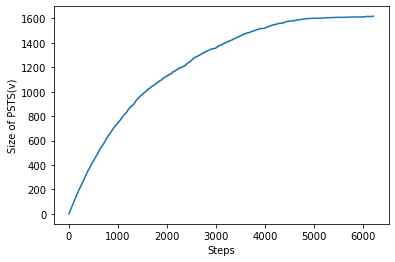

In [13]:
plt.plot(size_steps)
plt.xlabel("Steps")
plt.ylabel("Size of PSTS(v)")
plt.savefig("./figs/STS(v="+str(v)+")")